## Experiment 7 - CNN Model - Cats & Dogs Classification

## Problem Statement:
To create CNN model with dataset containing images of cats and dogs for image classification.

## GitHub & Colab Link:

GitHub Link: https://github.com/piyush-gambhir/ncu-lab-manual-and-end-semester-projects/blob/main/NCU-CSL312%20-%20DL%20-%20Lab%20Manual/Experiment%207/Experiment%207.ipynb

Google Colab Link:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/piyush-gambhir/ncu-lab-manual-and-end-semester-projects/blob/main/NCU-CSL312%20-%20DL%20-%20Lab%20Manual/Experiment%207/Experiment%207.ipynb)


## Dataset

Dataset Link: https://www.kaggle.com/datasets/tongpython/cat-and-dog

## Installing Dependencies:

In [1]:
! pip install tabulate numpy pandas matplotlib seaborn scikit-learn tensorflow keras 

## Code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:

# Model definition
import warnings
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compiler settings
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Suppress warnings
warnings.filterwarnings('ignore')

c:\Users\mainp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [8]:
# Image data augmentation and generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory('./dataset/training_set',
                                              target_size=(64, 64),
                                              batch_size=32,
                                              class_mode='binary')

test_set = test_datagen.flow_from_directory('./dataset/test_set',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [11]:
# Model training
history = model.fit(
    train_set,
    steps_per_epoch=100,  # Adjust based on your dataset size
    epochs=20,            # Training for 20 epochs
    validation_data=test_set,
    validation_steps=50   # Adjust based on your validation set size
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 99s 937ms/step - accuracy: 0.4903 - loss: 0.7411 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 66s 662ms/step - accuracy: 0.5265 - loss: 0.6923 - val_accuracy: 0.5579 - val_loss: 0.6862
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 471ms/step - accuracy: 0.5937 - loss: 0.6724 - val_accuracy: 0.6456 - val_loss: 0.6417
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 95s 920ms/step - accuracy: 0.6341 - loss: 0.6418 - val_accuracy: 0.6194 - val_loss: 0.6352
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 97s 976ms/step - accuracy: 0.6680 - loss: 0.6133 - val_accuracy: 0.6906 - val_loss: 0.6060
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 375ms/step - accuracy: 0.6771 - loss: 0.5966 - val_accuracy: 0.7234 - val_loss: 0.6035
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.7049 - loss: 0.5831 - val_accuracy: 0.7138 - val_loss: 0.5685
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 79s 795ms/step - accuracy: 0.7114 - loss: 0.5

In [12]:
# Save the trained model
model.save('cat_dog_classifier_model.h5')

In [14]:
# Model evaluation using the new 'evaluate' method
eval_result = model.evaluate(test_set)
print(f"Validation Accuracy: {eval_result[1]*100:.2f}%, Validation Loss: {eval_result[0]:.6f}")


64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 419ms/step - accuracy: 0.7738 - loss: 0.4813
Validation Accuracy: 76.52%, Validation Loss: 0.493094


64/64 ━━━━━━━━━━━━━━━━━━━━ 25s 386ms/step


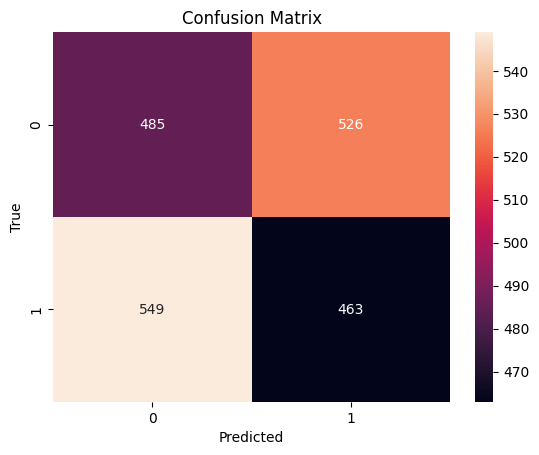

In [15]:
# Confusion matrix on the test set
y_pred = model.predict(test_set)
y_pred = (y_pred > 0.5)
y_true = test_set.classes
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()